In [18]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict

In [19]:
# Read data from Cleaned JSON
data = pd.read_json('ratebeer_cleaned.json.gz', compression='gzip', lines=True)

In [20]:
# EDA

In [21]:
# Step 1: Data Overview
# Check for missing values
missing_values = data.isnull().sum()

# Determine unique counts for key columns
unique_beers = data['beer/beerId'].nunique()
unique_breweries = data['beer/brewerId'].nunique()
unique_reviewers = data['review/profileName'].nunique()

# Display the results
print("Missing Values Per Column:\n", missing_values)
print("\nUnique Counts:")
print(f"Number of unique beers: {unique_beers}")
print(f"Number of unique breweries: {unique_breweries}")
print(f"Number of unique reviewers: {unique_reviewers}")

Missing Values Per Column:
 beer/name             0
beer/beerId           0
beer/brewerId         0
beer/ABV              0
beer/style            0
review/appearance     0
review/aroma          0
review/palate         0
review/taste          0
review/overall        0
review/time           0
review/profileName    0
review/text           0
dtype: int64

Unique Counts:
Number of unique beers: 506
Number of unique breweries: 154
Number of unique reviewers: 6688


In [22]:
# Step 2: Summary Statistics

# Convert rating columns to numeric values if they are not already
rating_columns = ['review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'review/overall']
for column in rating_columns:
    # data[column] = pd.to_numeric(data[column], errors='coerce')
    data[column] = data[column].apply(lambda x: float(x.split('/')[0]) / float(x.split('/')[1]))

# Compute summary statistics for numerical columns
numerical_summary = data[['beer/ABV', 'review/appearance', 'review/aroma', 
                          'review/palate', 'review/taste', 'review/overall']].describe()

# Display the summary statistics
print("\nSummary Statistics for Numerical Columns:\n", numerical_summary)


Summary Statistics for Numerical Columns:
             beer/ABV  review/appearance   review/aroma  review/palate  \
count  619499.000000      619499.000000  619499.000000  619499.000000   
mean        7.162832           0.724470       0.667631       0.691391   
std         2.467678           0.174429       0.179904       0.176932   
min         3.500000           0.200000       0.100000       0.200000   
25%         5.200000           0.600000       0.600000       0.600000   
50%         6.500000           0.800000       0.700000       0.800000   
75%         9.000000           0.800000       0.800000       0.800000   
max        18.500000           1.000000       1.000000       1.000000   

        review/taste  review/overall  
count  619499.000000   619499.000000  
mean        0.682629        0.703741  
std         0.172602        0.177479  
min         0.100000        0.050000  
25%         0.600000        0.650000  
50%         0.700000        0.750000  
75%         0.800000     


Correlations Between Individual Ratings and Overall Rating:
 review/appearance    0.609912
review/aroma         0.798900
review/palate        0.716794
review/taste         0.881948
Name: review/overall, dtype: float64


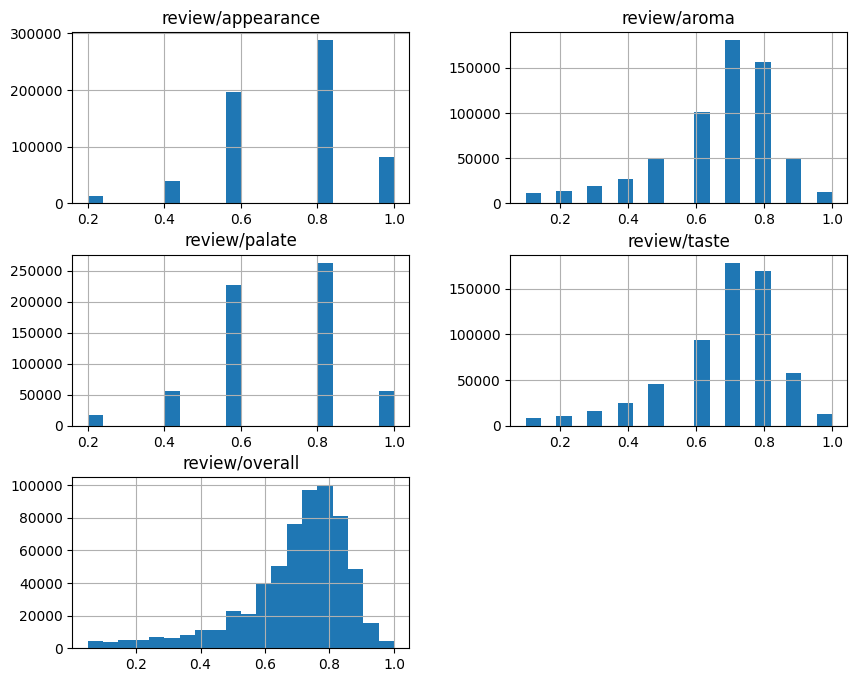

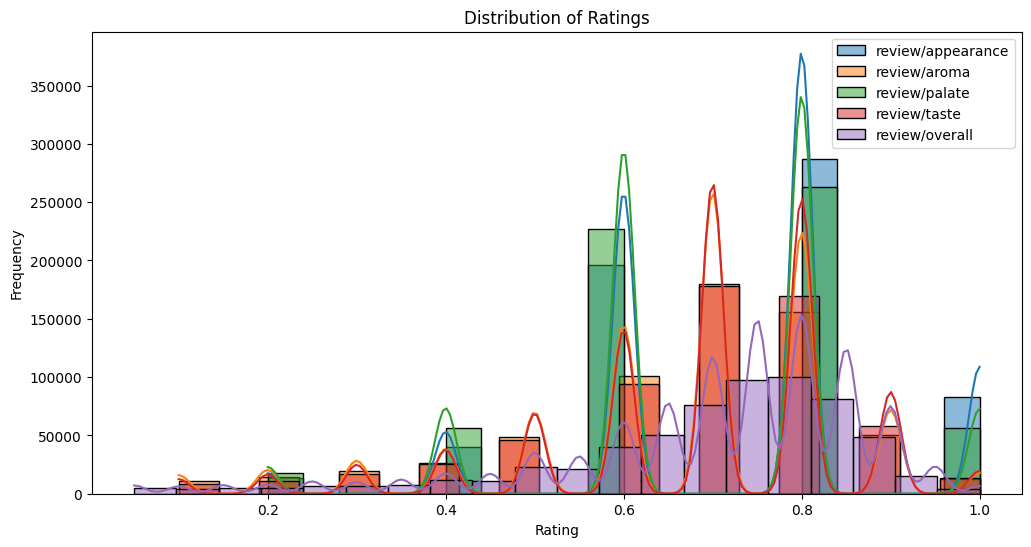

In [23]:
# Step 3: Ratings Analysis

# Analyze distributions of ratings
rating_distributions = data[rating_columns].hist(figsize=(10, 8), bins=20)

# Compute correlations between individual ratings and overall rating
correlations = data[rating_columns].corr()['review/overall'].drop('review/overall')

# Display the correlations
print("\nCorrelations Between Individual Ratings and Overall Rating:\n", correlations)

# Analyze rating distributions together
plt.figure(figsize=(12, 6))
for col in rating_columns:
    sns.histplot(data[col], bins=20, kde=True, label=col)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

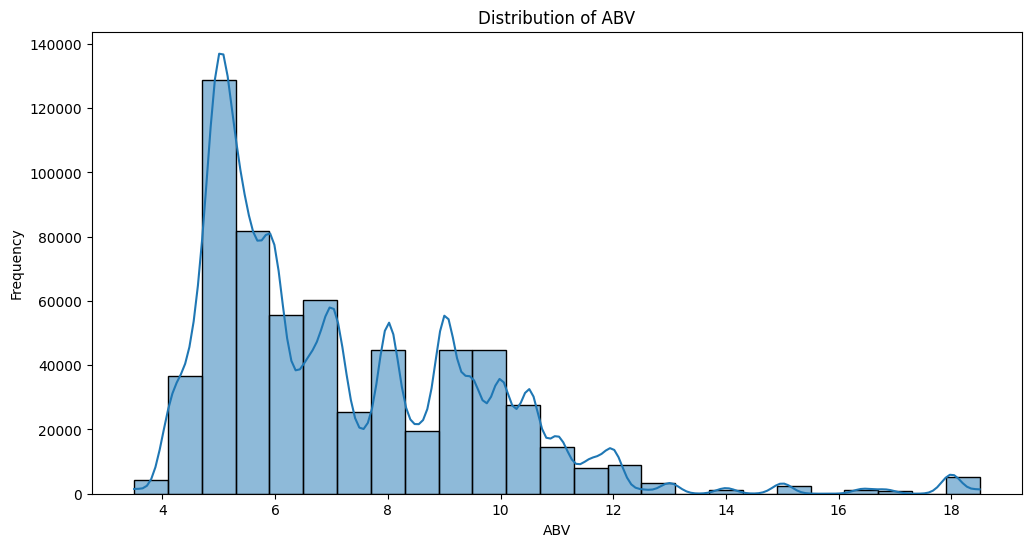

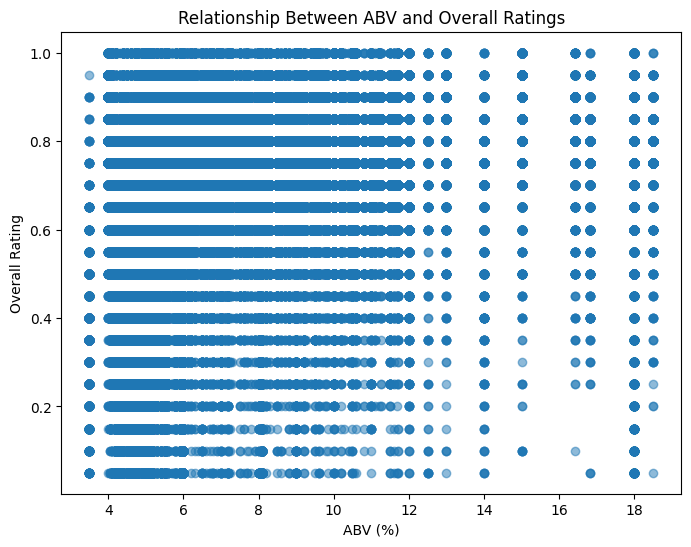


Most Common Beer Styles:
 beer/style
India Pale Ale &#40;IPA&#41;    48608
Imperial Stout                  47675
Pale Lager                      46086
Belgian Strong Ale              45906
Imperial/Double IPA             35313
Name: count, dtype: int64

Average Ratings by Beer Style:
 beer/style
Abt/Quadrupel             0.825556
Imperial Stout            0.818808
Imperial/Double IPA       0.803477
Weizen Bock               0.801540
Imperial/Strong Porter    0.795189
Name: review/overall, dtype: float64


In [39]:
data['beer/ABV'] = pd.to_numeric(data['beer/ABV'], errors='coerce')

# Step 4: Exploration by Category
# Most common beer styles and their average ratings
style_counts = data['beer/style'].value_counts()
style_avg_ratings = data.groupby('beer/style')['review/overall'].mean().sort_values(ascending=False)

# ABV analysis
plt.figure(figsize=(12, 6))
sns.histplot(data['beer/ABV'].dropna(), bins=25, kde=True)
plt.title('Distribution of ABV')
plt.xlabel('ABV')
plt.ylabel('Frequency')
plt.show()

# Relationship between ABV and overall ratings
plt.figure(figsize=(8, 6))
plt.scatter(data['beer/ABV'], data['review/overall'], alpha=0.5)
plt.title('Relationship Between ABV and Overall Ratings')
plt.xlabel('ABV (%)')
plt.ylabel('Overall Rating')
plt.show()

# Display the most common styles and their average ratings
print("\nMost Common Beer Styles:\n", style_counts.head())
print("\nAverage Ratings by Beer Style:\n", style_avg_ratings.head())

review/profileName
Tmoney99     527
DocLock      520
daknole      520
bhensonb     520
hopscotch    518
Name: count, dtype: int64
User Review Counts: count    6688.000000
mean       92.628439
std       105.377376
min        10.000000
25%        20.000000
50%        47.000000
75%       122.250000
max       527.000000
Name: count, dtype: float64


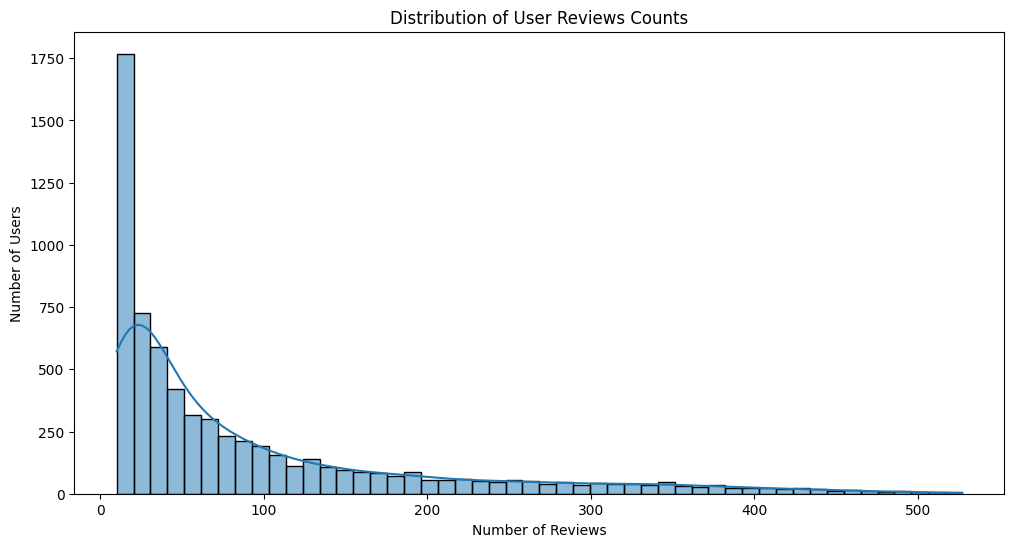

In [25]:
# User activity analysis
user_activity = data['review/profileName'].value_counts()
print(user_activity.head())

# User behavior analysis
user_review_counts = data['review/profileName'].value_counts()
print("User Review Counts:", user_review_counts.describe())

# User Activity (count) plot
plt.figure(figsize=(12, 6))
sns.histplot(user_review_counts.dropna(), bins=50, kde=True)
plt.title('Distribution of User Reviews Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.show()

# review_count_cutoff = 10
# users_to_remove = user_review_counts[user_review_counts < review_count_cutoff].index
# mod_data = data[~data['review/profileName'].isin(users_to_remove)]
# mod_user_review_counts = mod_data['review/profileName'].value_counts()
# print(f"Total Users with more than {review_count_cutoff} reviews = {len(mod_data['review/profileName'].unique())}")
# print("Total Number of reviews remaining = ", len(mod_data))
# print("(Mod) User Review Counts:", mod_user_review_counts.describe())
# # Mod User Activity (count) plot
# plt.figure(figsize=(12, 6))
# sns.histplot(mod_user_review_counts.dropna(), bins=50, kde=True)
# plt.title('Distribution of User Reviews Counts (Mod)')
# plt.xlabel('Number of Reviews')
# plt.ylabel('Number of Users')
# plt.show()

In [26]:
# Item popularity analysis
item_popularity = data['beer/name'].value_counts()
print(item_popularity.head())

beer/name
Pabst Blue Ribbon                          3034
Guinness Draught                           2995
Dogfish Head 90 Minute Imperial IPA        2854
Samuel Adams Boston Lager                  2815
Sierra Nevada Pale Ale &#40;Bottle&#41;    2760
Name: count, dtype: int64


In [27]:
# Sparsity check
num_users = data['review/profileName'].nunique()
num_items = data['beer/name'].nunique()
sparsity = 1 - len(data) / (num_users * num_items)
print(f"Data sparsity: {sparsity:.2%}")

Data sparsity: 81.69%


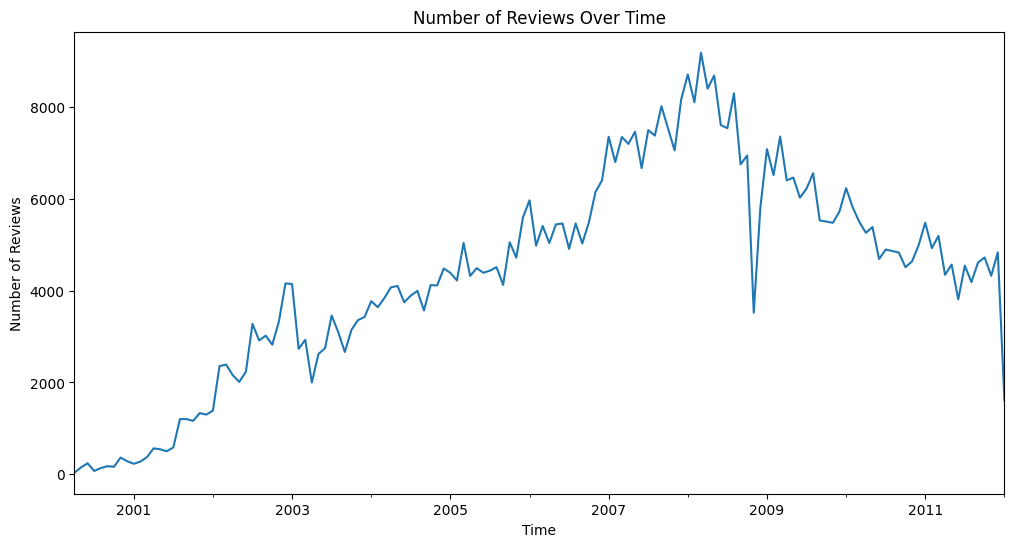

In [28]:
# Convert review time to datetime
data['review/time'] = pd.to_datetime(data['review/time'], unit='s')

# Temporal analysis
plt.figure(figsize=(12, 6))
data['review/time'].dt.to_period('M').value_counts().sort_index().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.show()

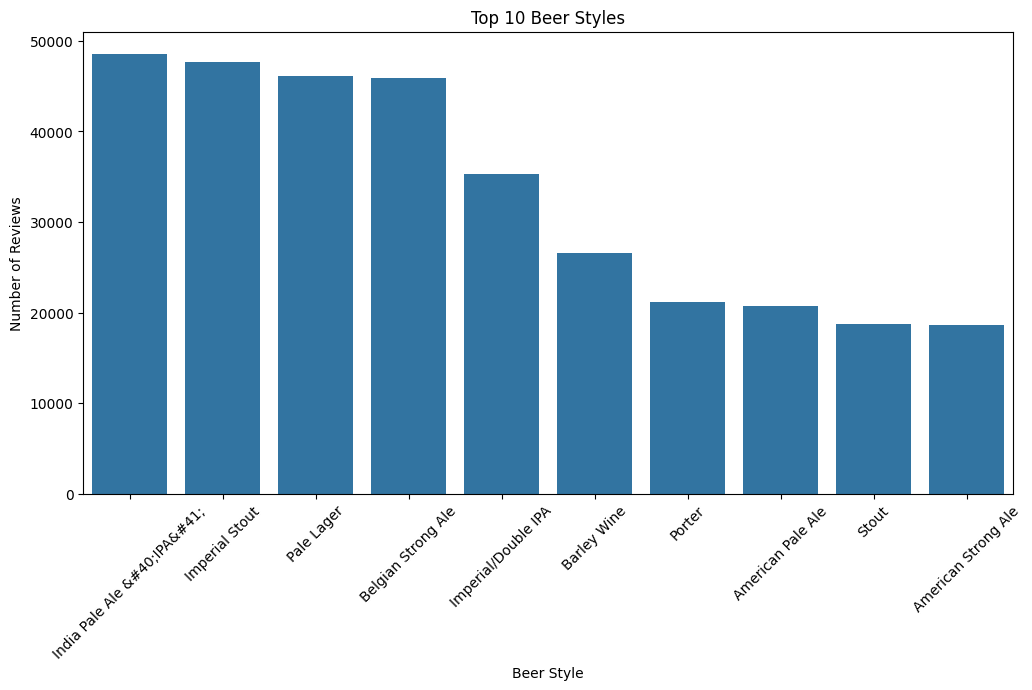

In [29]:
# Beer style analysis
top_styles = data['beer/style'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_styles.index, y=top_styles.values)
plt.xticks(rotation=45)
plt.title('Top 10 Beer Styles')
plt.xlabel('Beer Style')
plt.ylabel('Number of Reviews')
plt.show()

In [30]:
# Brewery analysis
top_breweries = data['beer/brewerId'].value_counts().head(10)
print("Top Breweries by Number of Reviews:", top_breweries)

Top Breweries by Number of Reviews: beer/brewerId
32     28142
198    25766
76     21341
96     20009
232    19127
67     18820
15     14465
109    12936
180    12758
292    12387
Name: count, dtype: int64


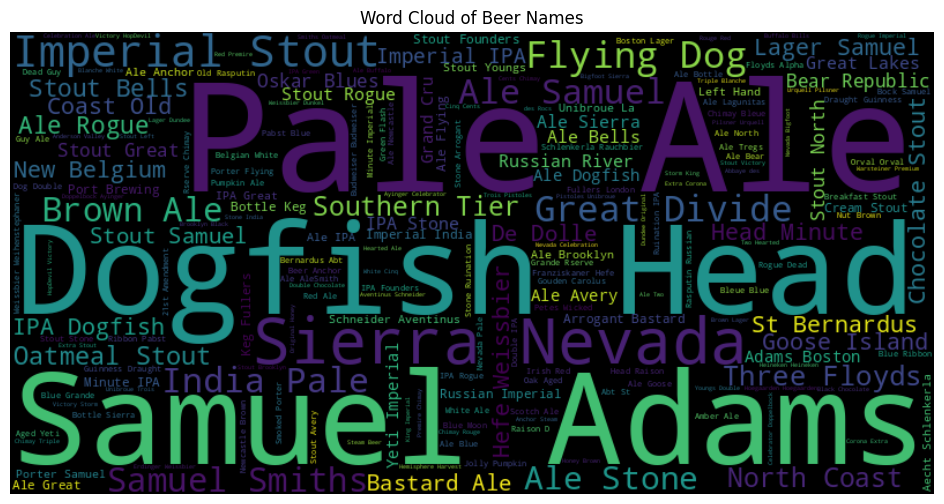

In [31]:
# Text analysis (Word Cloud for beer names)
text = ' '.join(data['beer/name'].astype(str))
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Beer Names')
plt.show()

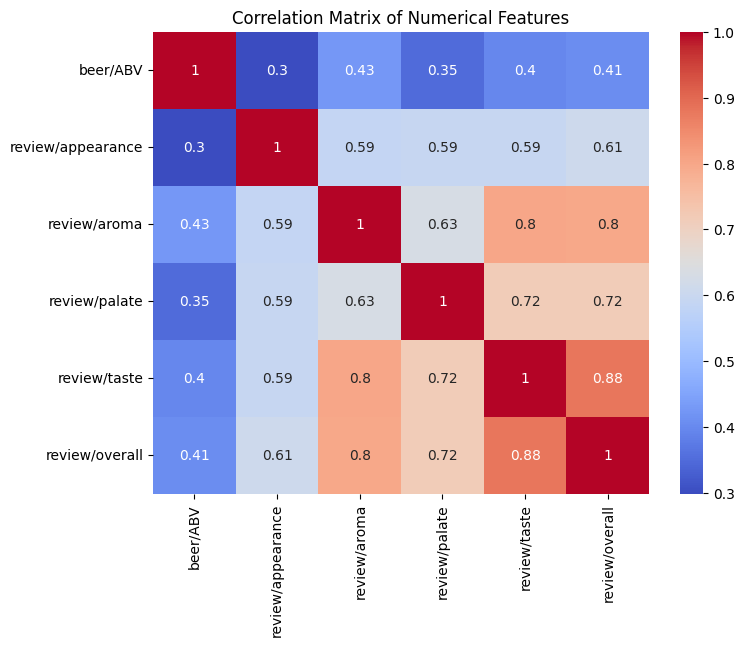

In [32]:
# Correlation analysis
corr = data[['beer/ABV'] + rating_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [33]:
# beer_styles = list(data['beer/style'].unique())
beer_styles_dist = data['beer/style'].value_counts(normalize=True)
data['beer/style_dist'] = data['beer/style'].map(beer_styles_dist)
data['beer/style_dist']

0         0.015333
1         0.015333
2         0.015333
3         0.015333
4         0.015333
            ...   
619494    0.023411
619495    0.023411
619496    0.023411
619497    0.023411
619498    0.023411
Name: beer/style_dist, Length: 619499, dtype: float64

In [34]:
data['beer/style_dist_wt'] = data['beer/style'].map(beer_styles_dist) * data['beer/style'].map(style_avg_ratings)
data['beer/style_dist_wt']

0         0.011777
1         0.011777
2         0.011777
3         0.011777
4         0.011777
            ...   
619494    0.016474
619495    0.016474
619496    0.016474
619497    0.016474
619498    0.016474
Name: beer/style_dist_wt, Length: 619499, dtype: float64

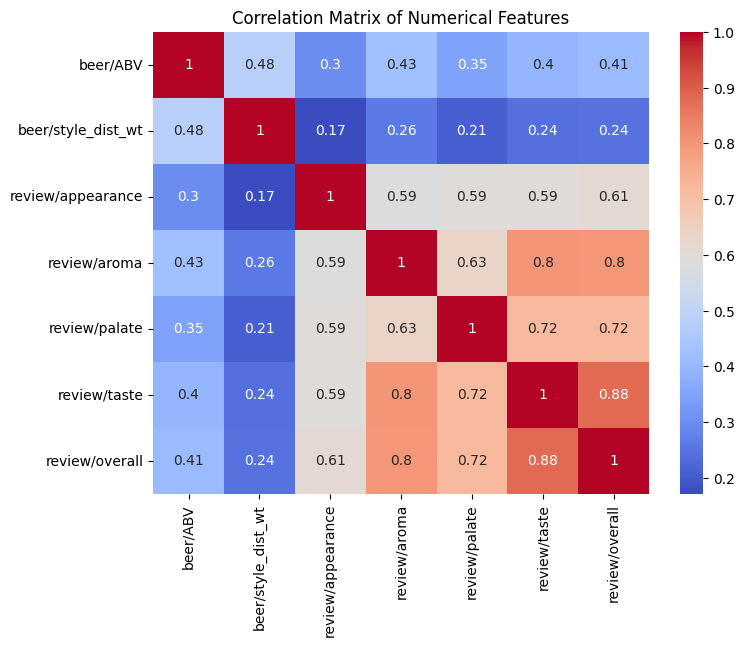

In [35]:
# New Correlation analysis
corr = data[['beer/ABV'] + ['beer/style_dist_wt'] + rating_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [36]:
style_avg_ratings

beer/style
Abt/Quadrupel             0.825556
Imperial Stout            0.818808
Imperial/Double IPA       0.803477
Weizen Bock               0.801540
Imperial/Strong Porter    0.795189
                            ...   
Klsch                     0.530366
American Dark Lager       0.508735
Premium Lager             0.485353
Pale Lager                0.344585
Malt Liquor               0.255857
Name: review/overall, Length: 65, dtype: float64

In [37]:
data['beer/ABV'].value_counts(sort=True, ascending=False)

beer/ABV
5.00     45704
9.00     29370
8.00     29102
6.00     24955
5.20     24705
         ...  
4.88       846
12.50      845
10.01      837
5.77       790
6.40       774
Name: count, Length: 101, dtype: int64